A sine/cosine wave with specific frequency $k$ corresponds to (cosine is the same with cos or with + $\frac{\pi}{2}$):
$$sine(k, t)=sin(2 \pi k \cdot t)$$

The DFT could then be directly derived from the formula:
$$X_k=\sum_{n=0}^{N-1}x_n \cdot e^{-i\frac{2\pi}{N}\cdot kn}$$

Coding everything would yield:

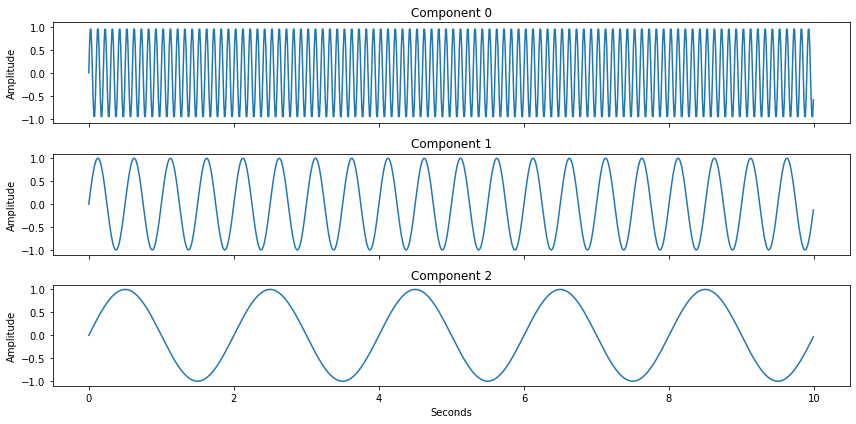

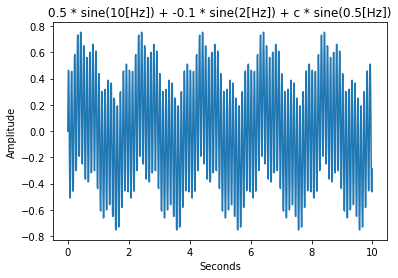

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

def create_cosine_k_N(k, N):
    return np.cos((2*np.pi*k/N)*np.arange(N))

def create_sine_k_N(k, N):
    return np.sin((2*np.pi*k/N)*np.arange(N))

def DFT(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

t = 10
fs = 100
N = t*fs
num_components = 3
components = np.zeros((num_components, N))
h0, h1, h2 = 10, 2, 0.5
components[0] = create_sine_k_N(t * h0, N)
components[1] = create_sine_k_N(t * h1, N)
components[2] = create_sine_k_N(t * h2, N)
fig, ax  = plt.subplots(nrows=num_components, sharex=True, figsize=(12,6))
x_vals = np.arange(N) / fs

for i in range(num_components):
        ax[i].plot(x_vals, components[i])
        ax[i].set_ylim((-1.1, 1.1))
        ax[i].set_title('Component {}'.format(i))
        ax[i].set_ylabel("Amplitude")
        ax[num_components-1].set_xlabel("Seconds")
        plt.tight_layout()
plt.show()

# PLOT SIGNAL
a, b, c = 0.5, -0.1, 0.2
x = a * components[0] + b * components[1] + c * components[2]
plt.plot(x_vals, x)
plt.xlabel("Seconds")
plt.ylabel("Amplitude")
plt.title(f"{a} * sine({h0}[Hz]) + {b} * sine({h1}[Hz]) + c * sine({h2}[Hz])")
plt.show()

Now, let's observe the correlation between different signals

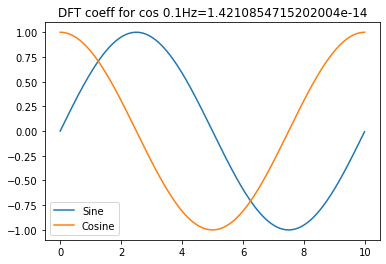

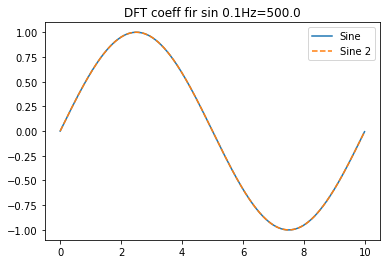

In [8]:
# Uncorrelated
signal_1 = create_sine_k_N(0.1 * t, N)
signal_2 = create_cosine_k_N(0.1 * t, N)
plt.plot(x_vals, signal_1, label="Sine")
plt.plot(x_vals, signal_2, label="Cosine")
plt.title("DFT coeff for cos 0.1Hz={}".format(np.sum(signal_1*signal_2)))
plt.legend()
plt.show()

# Highly correlated 
signal_1 = create_sine_k_N(0.1*t, N)
signal_2 = create_sine_k_N(0.1*t, N)
plt.plot(x_vals, signal_1, label="Sine")
plt.plot(x_vals, signal_2, label="Sine 2",linestyle='--')
plt.title("DFT coeff fir sin 0.1Hz={}".format(np.sum(signal_1*signal_2)))
plt.legend()
plt.show()

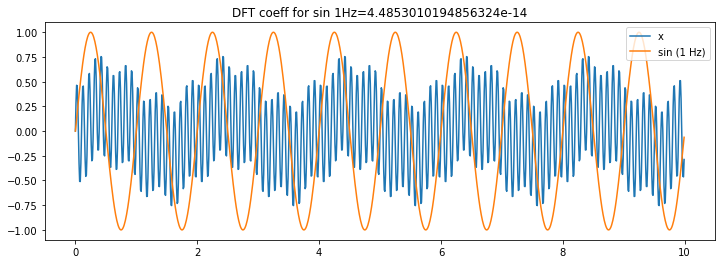

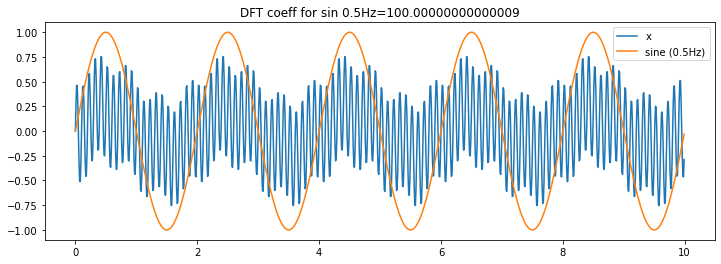

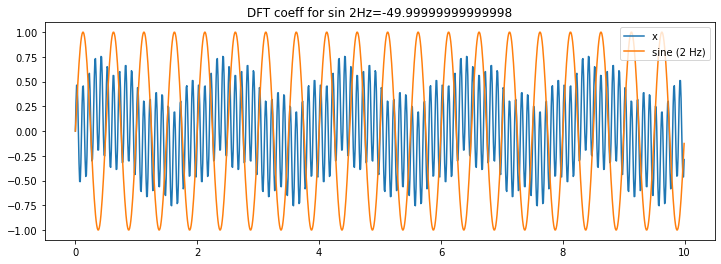

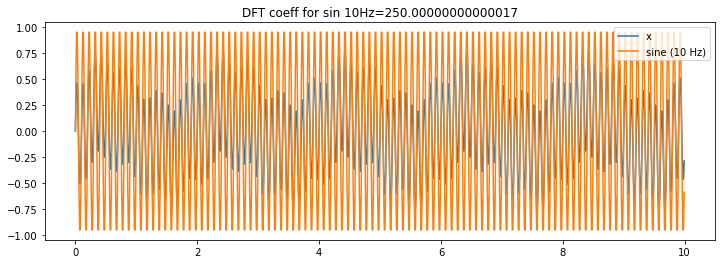

In [9]:
# Correlation with the sum of sines we generated earlier
plt.figure(figsize=(12, 4))
sin_1 = create_sine_k_N(1*t, N)
plt.plot(x_vals, x, label="x")
plt.plot(x_vals, sin_1, label="sin (1 Hz)")
plt.title("DFT coeff for sin 1Hz={}".format(np.sum(sin_1*x)))
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
sin_5 = create_sine_k_N(0.5*t, N)
plt.plot(x_vals, x, label="x")
plt.plot(x_vals, sin_5, label="sine (0.5Hz)")
plt.title("DFT coeff for sin 0.5Hz={}".format(np.sum(sin_5*x)))
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
sin_2 = create_sine_k_N(2*t, N)
plt.plot(x_vals, x, label="x")
plt.plot(x_vals, sin_2, label="sine (2 Hz)")
plt.title("DFT coeff for sin 2Hz={}".format(np.sum(sin_2*x)))
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
sin_10 = create_sine_k_N(10*t, N)
plt.plot(x_vals, x, label="x")
plt.plot(x_vals, sin_10, label="sine (10 Hz)")
plt.title("DFT coeff for sin 10Hz={}".format(np.sum(sin_10*x)))
plt.legend()
plt.show()

Plotting the DFT

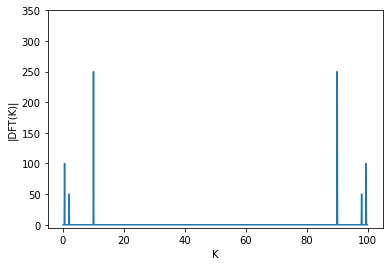

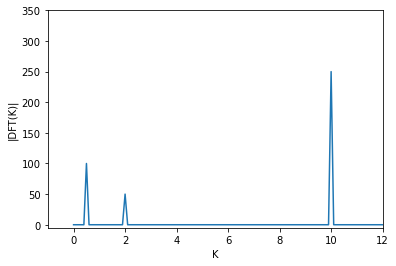

In [10]:
import time
st_time = time.time()
dft = DFT(x)
dft_time = time.time() - st_time
plt.plot(np.arange(0, t*fs)/10., abs(dft))
plt.ylim((-5, 350))
plt.xlabel("K")
plt.ylabel("|DFT(K)|")
plt.show()

plt.plot(np.arange(0, t*fs/2)/10., abs(dft)[:int((t*fs)/2)])
plt.xlim((-1, 12))
plt.ylim((-5, 350))
plt.xlabel("K")
plt.ylabel("|DFT(K)|")
plt.show()

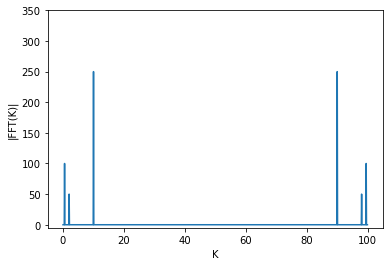

Time comparison:
DFT: 43.51[ms]
FFT: 1.14[ms]


In [11]:
# Time comparisons:
# FFT
st_t = time.time()
fft_x = np.fft.fft(x)
fft_time = time.time() - st_t
plt.plot(np.arange(0, t*fs)/10., abs(fft_x))
plt.ylim((-5, 350))
# plt.axvline(0, c="black", ls='--')
plt.xlabel("K")
plt.ylabel("|FFT(K)|")
plt.show()

print("Time comparison:")
print(f"DFT: {1000 * dft_time:2.2f}[ms]")
print(f"FFT: {1000 * fft_time:2.2f}[ms]")
